In [1]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image

from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [15]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
qualy = 'Q'
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :SQ
Piloto 1: RUS
Piloto 2: VER


In [16]:
# Cargar la carrera y clasificación
race = ff1.get_session(year, wknd, ses)
quali = ff1.get_session(year, wknd, qualy)

In [17]:
# Get the laps
laps_r = race.load(telemetry=True)
laps_q = quali.load(telemetry=True)

core           INFO 	Loading data for São Paulo Grand Prix - Sprint [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '77', '24', '6', '18', '3', '5', '10', '23', '16', '11', '44', '14', '31', '55', '4', '63', '1', '22', '47']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v2.2.8]


In [18]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:14.233000
Tipo de neumático:  SOFT
Piloto:  RUS


In [19]:
laps_drive1 = race.laps.pick_driver(driver1)
laps_drive2 = race.laps.pick_driver(driver2)

In [20]:
laps_drive1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
372,0 days 00:57:19.894000,63,NaT,1,1,0 days 00:23:15.880000,NaT,NaT,0 days 00:00:38.250000,0 days 00:00:17.074000,...,False,SOFT,1.0,True,0 days 00:56:00.694000,Mercedes,RUS,1,False,2022-11-12 19:33:01.280
373,0 days 00:58:35.105000,63,0 days 00:01:15.211000,2,1,NaT,NaT,0 days 00:00:19.275000,0 days 00:00:38.654000,0 days 00:00:17.282000,...,False,SOFT,2.0,True,0 days 00:57:19.894000,Mercedes,RUS,1,True,2022-11-12 19:34:20.480
374,0 days 00:59:50.183000,63,0 days 00:01:15.078000,3,1,NaT,NaT,0 days 00:00:19.379000,0 days 00:00:38.727000,0 days 00:00:16.972000,...,False,SOFT,3.0,True,0 days 00:58:35.105000,Mercedes,RUS,1,True,2022-11-12 19:35:35.691
375,0 days 01:01:04.416000,63,0 days 00:01:14.233000,4,1,NaT,NaT,0 days 00:00:19.026000,0 days 00:00:38.023000,0 days 00:00:17.184000,...,True,SOFT,4.0,True,0 days 00:59:50.183000,Mercedes,RUS,1,True,2022-11-12 19:36:50.769
376,0 days 01:02:18.950000,63,0 days 00:01:14.534000,5,1,NaT,NaT,0 days 00:00:19.117000,0 days 00:00:38.242000,0 days 00:00:17.175000,...,False,SOFT,5.0,True,0 days 01:01:04.416000,Mercedes,RUS,1,True,2022-11-12 19:38:05.002
377,0 days 01:03:33.595000,63,0 days 00:01:14.645000,6,1,NaT,NaT,0 days 00:00:19.112000,0 days 00:00:38.323000,0 days 00:00:17.210000,...,False,SOFT,6.0,True,0 days 01:02:18.950000,Mercedes,RUS,1,True,2022-11-12 19:39:19.536
378,0 days 01:04:48.405000,63,0 days 00:01:14.810000,7,1,NaT,NaT,0 days 00:00:19.065000,0 days 00:00:38.498000,0 days 00:00:17.247000,...,False,SOFT,7.0,True,0 days 01:03:33.595000,Mercedes,RUS,1,True,2022-11-12 19:40:34.181
379,0 days 01:06:03.645000,63,0 days 00:01:15.240000,8,1,NaT,NaT,0 days 00:00:19.188000,0 days 00:00:38.638000,0 days 00:00:17.414000,...,False,SOFT,8.0,True,0 days 01:04:48.405000,Mercedes,RUS,1,True,2022-11-12 19:41:48.991
380,0 days 01:07:18.825000,63,0 days 00:01:15.180000,9,1,NaT,NaT,0 days 00:00:19.247000,0 days 00:00:38.528000,0 days 00:00:17.405000,...,False,SOFT,9.0,True,0 days 01:06:03.645000,Mercedes,RUS,1,True,2022-11-12 19:43:04.231
381,0 days 01:08:33.550000,63,0 days 00:01:14.725000,10,1,NaT,NaT,0 days 00:00:19.274000,0 days 00:00:38.210000,0 days 00:00:17.241000,...,False,SOFT,10.0,True,0 days 01:07:18.825000,Mercedes,RUS,1,True,2022-11-12 19:44:19.411


In [21]:
laps_drive2

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
396,0 days 00:57:19.708000,1,NaT,1,1,0 days 00:26:21.036000,NaT,NaT,0 days 00:00:38.182000,0 days 00:00:17.191000,...,False,MEDIUM,1.0,True,0 days 00:56:00.694000,Red Bull Racing,VER,1,False,2022-11-12 19:33:01.280
397,0 days 00:58:34.553000,1,0 days 00:01:14.845000,2,1,NaT,NaT,0 days 00:00:19.359000,0 days 00:00:38.316000,0 days 00:00:17.170000,...,False,MEDIUM,2.0,True,0 days 00:57:19.708000,Red Bull Racing,VER,1,True,2022-11-12 19:34:20.294
398,0 days 00:59:49.105000,1,0 days 00:01:14.552000,3,1,NaT,NaT,0 days 00:00:19.224000,0 days 00:00:38.085000,0 days 00:00:17.243000,...,False,MEDIUM,3.0,True,0 days 00:58:34.553000,Red Bull Racing,VER,1,True,2022-11-12 19:35:35.139
399,0 days 01:01:03.629000,1,0 days 00:01:14.524000,4,1,NaT,NaT,0 days 00:00:19.183000,0 days 00:00:38.029000,0 days 00:00:17.312000,...,False,MEDIUM,4.0,True,0 days 00:59:49.105000,Red Bull Racing,VER,1,True,2022-11-12 19:36:49.691
400,0 days 01:02:18.136000,1,0 days 00:01:14.507000,5,1,NaT,NaT,0 days 00:00:19.156000,0 days 00:00:38.002000,0 days 00:00:17.349000,...,True,MEDIUM,5.0,True,0 days 01:01:03.629000,Red Bull Racing,VER,1,True,2022-11-12 19:38:04.215
401,0 days 01:03:32.780000,1,0 days 00:01:14.644000,6,1,NaT,NaT,0 days 00:00:19.031000,0 days 00:00:38.272000,0 days 00:00:17.341000,...,False,MEDIUM,6.0,True,0 days 01:02:18.136000,Red Bull Racing,VER,1,True,2022-11-12 19:39:18.722
402,0 days 01:04:47.619000,1,0 days 00:01:14.839000,7,1,NaT,NaT,0 days 00:00:19.215000,0 days 00:00:38.242000,0 days 00:00:17.382000,...,False,MEDIUM,7.0,True,0 days 01:03:32.780000,Red Bull Racing,VER,1,True,2022-11-12 19:40:33.366
403,0 days 01:06:02.505000,1,0 days 00:01:14.886000,8,1,NaT,NaT,0 days 00:00:19.206000,0 days 00:00:38.256000,0 days 00:00:17.424000,...,False,MEDIUM,8.0,True,0 days 01:04:47.619000,Red Bull Racing,VER,1,True,2022-11-12 19:41:48.205
404,0 days 01:07:17.699000,1,0 days 00:01:15.194000,9,1,NaT,NaT,0 days 00:00:19.281000,0 days 00:00:38.439000,0 days 00:00:17.474000,...,False,MEDIUM,9.0,True,0 days 01:06:02.505000,Red Bull Racing,VER,1,True,2022-11-12 19:43:03.091
405,0 days 01:08:32.823000,1,0 days 00:01:15.124000,10,1,NaT,NaT,0 days 00:00:19.222000,0 days 00:00:38.445000,0 days 00:00:17.457000,...,False,MEDIUM,10.0,True,0 days 01:07:17.699000,Red Bull Racing,VER,1,True,2022-11-12 19:44:18.285


In [22]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

24
24


In [23]:
piloto1 = race.get_driver(driver1)
piloto2 = race.get_driver(driver2)

In [24]:
d1_team = pd.unique(laps_drive1['Team'])
print(d1_team)

['Mercedes']


In [25]:
color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)
#Si el gráfico es similar se pone otro color Blanco
#color2 = '#FFFFFF'

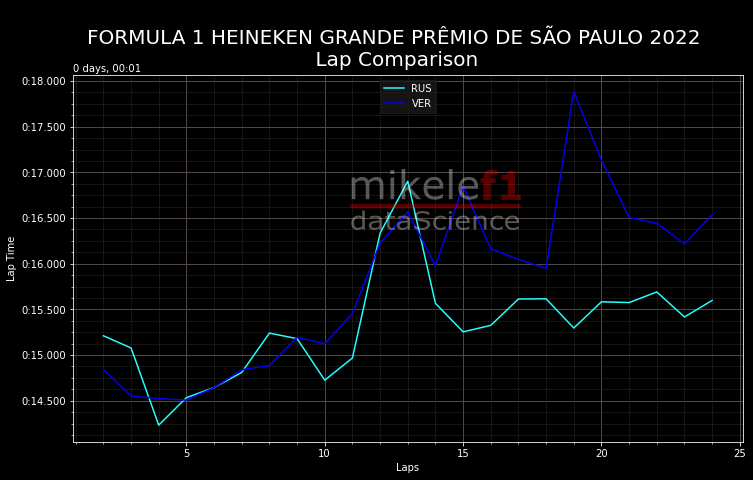

In [26]:
plt.rcParams['figure.figsize'] = [12, 12]
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]


plt.suptitle(f"\n{race.event['OfficialEventName']} \n Lap Comparison \n"
             , size=20, y=1.02)

#fig, ax = plt.subplots()
#plt.suptitle(f"Lap Comparison \n "
#             f"{race.event['EventName']} {race.event.year} Race \n")
#             f"{piloto1['FullName']} &  {piloto2['FullName']} \n")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], color = color1,  label=piloto1['Abbreviation'])
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'], color = color2 , label=piloto2['Abbreviation'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.legend(loc="upper center")

fig.figimage(im, xo=350, yo=250, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LC'+ses+'-'+driver1+'-'+driver2+'.png'
plt.savefig(nombrearchivo)
plt.show()